In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

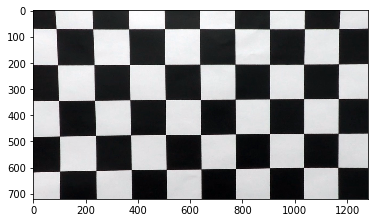

In [16]:
#Calibrating the Camera

#filenames of all calibration images
files = glob.glob('./camera_cal/calibration*.jpg')

chessshape = (9,6)
objpoints = [] # Real world coordinates in 3D
imgpoints = [] # 2D points in image plane

cal_images = [] # all images of calibration

# setup object points consant for each calibration image
objp = np.zeros((chessshape[0]*chessshape[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:chessshape[0],0:chessshape[1]].T.reshape(-1,2)

# iterate through all images
for fname in files:
    # read image
    image = cv2.imread(fname)
    cal_images.append(np.copy(image))
    # convert to grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # find chesscorners
    ret, corners = cv2.findChessboardCorners(gray, chessshape, None)

    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        img = cv2.drawChessboardCorners(image, chessshape, corners, ret)

# Actual calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

In [ ]:
# test calibration


# test calibration image
test_cal_image = cv2.imread('./camera_cal/calibration1.jpg')

dst = cv2.undistort(test_cal_image, mtx, dist, None, mtx)

# show image
plt.figure()
plt.imshow(dst, cmap='gray')

In [13]:
gray.shape[::-1]

(1280, 720)